In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from skimage import data as skdata
from skimage import transform as sktf
from skimage.util import random_noise

from scipy import ndimage

In [28]:
data = pd.read_csv("./input/train.csv")

In [30]:
m = len(data)
X = np.array(data.loc[:, data.columns != 'label'])
X = X.reshape(m, 28, 28)
Y = np.array(data['label'])

X = X / 256

In [31]:
def plot_img(img):
    plt.close()
    plt.figure()
    plt.imshow(img)
    plt.show()

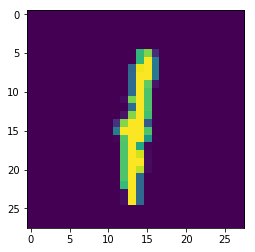

In [32]:
img = X[12,:,:]
plot_img(img)

In [105]:
def new_image(img):
    #perform each transformation with probability 0.7
    transf = np.random.random(4) > 0.3
    
    #shift
    if transf[0]:
        img = ndimage.shift(img, np.random.randint(-3,4,2))
    #rotation
    if transf[1]:
        img = sktf.rotate(img, np.random.randint(-20,21))
    #warp
    if transf[2]:
        affine_tf = sktf.AffineTransform(shear=np.radians(np.random.randint(-10,11)))
        img = sktf.warp(img, affine_tf, mode='constant')
    #random noise
    if transf[3]:
        img = random_noise(img, var=pow(10., np.random.randint(-4, -1)))
    
    return img
    

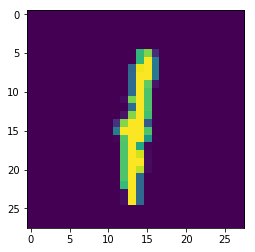

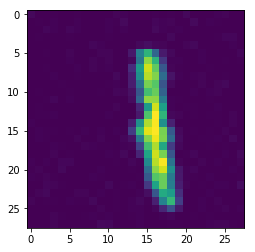

In [110]:
plot_img(img)
plot_img(new_image(img))

In [146]:
X_aug = []
Y_aug = []
i = 0
m = len(Y)
for img,lab in zip(X, Y):
    if i%1000==0:
        print("step {} of {}.".format(i, m))
    X_aug.append(img)
    Y_aug.append(lab)
    for i in range(9):
        X_aug.append(new_image(img))
        Y_aug.append(lab)
    i+=1

step 0 of 42000.


KeyboardInterrupt: 

In [ ]:
mn = len(X_aug)
X_aug = np.array(X_aug).reshape(mn, 28, 28)
Y_aug = np.array(Y_aug)

In [ ]:
X_augg, Y_augg = shuffle(X_aug, Y_aug)

In [141]:
np.savez_compressed('augmented', x=X_augg, y=Y_augg)